## Stokes Flow in Periodic Channel with Robin boundary.

In [1]:
import sys
sys.path.append('/home/emastr/phd/')

import torch
import time
import numpy as np
import matplotlib.pyplot as plt
from stokes2d.robin_solver import testSolve

/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return n

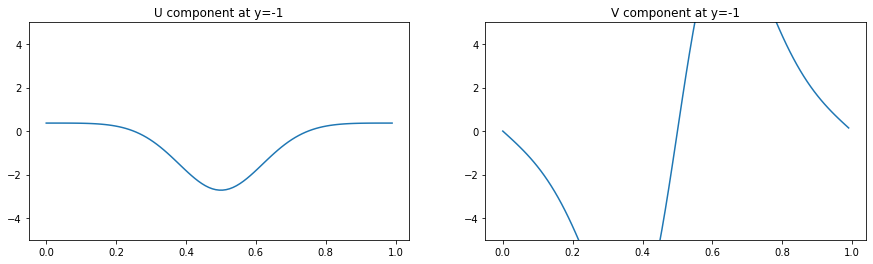

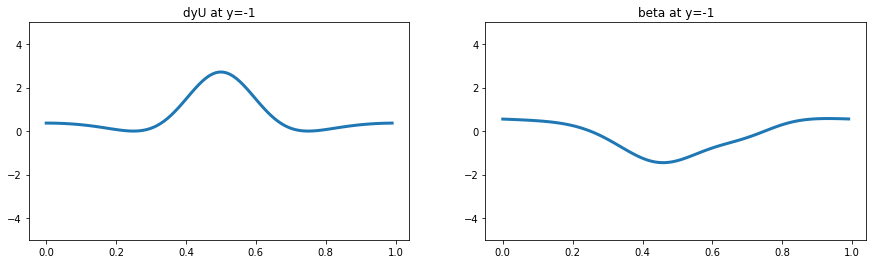

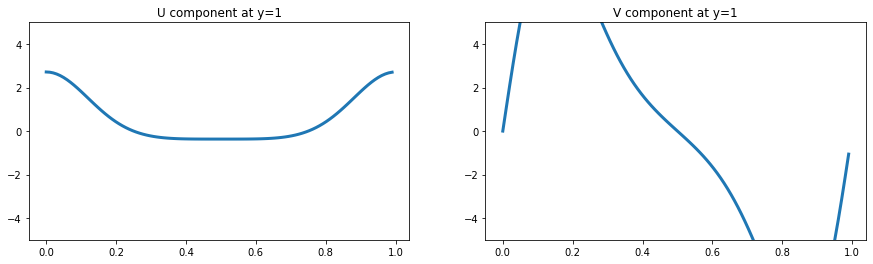

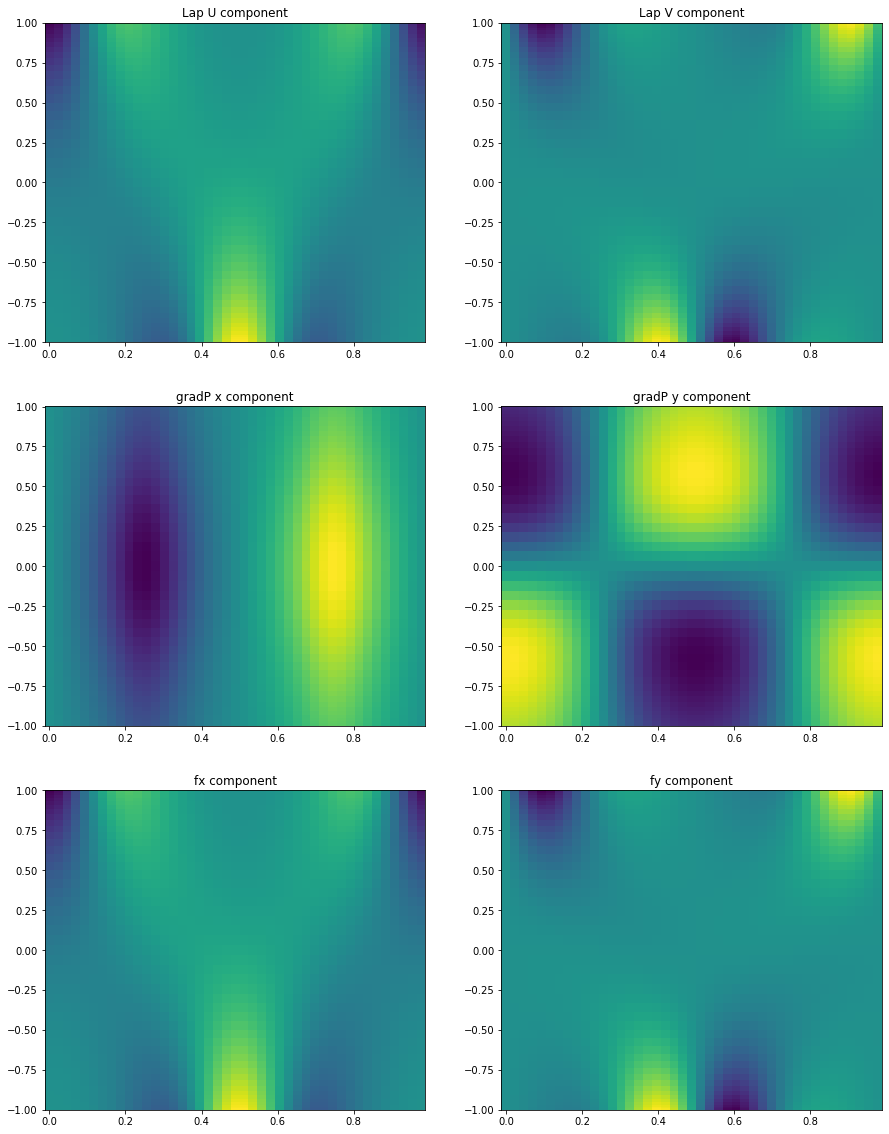

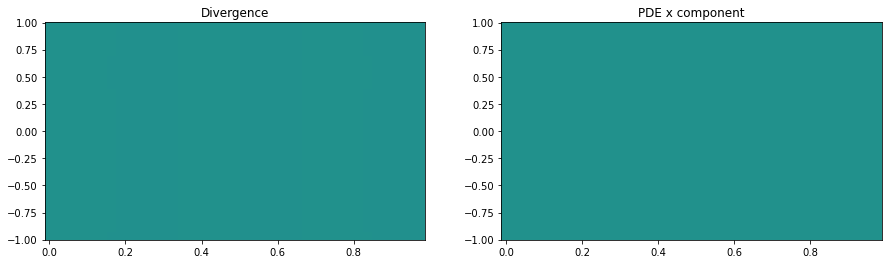

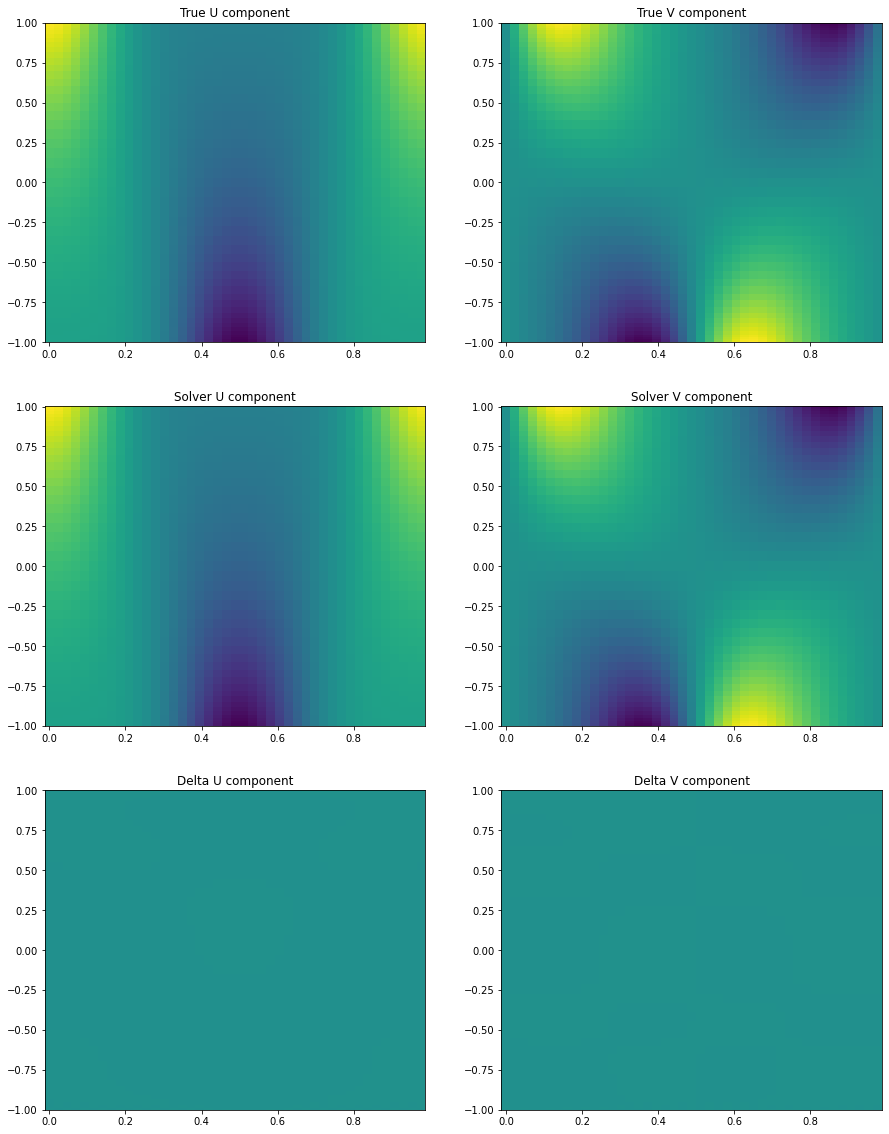

In [3]:
testSolve(43,51)

/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


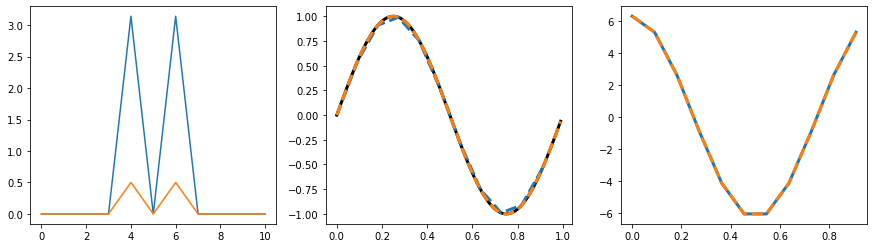

In [3]:
import sys
sys.path.append('/home/emastr/phd/')
from util.basis import Basis, ChebBasis, FourBasis, BasisProduct

CurBasis = FourBasis

dim = 11
x = CurBasis._grid(dim)
f = lambda x: np.sin(2*np.pi*x)#np.exp(np.sin(2*x))
df = lambda x: 2*np.pi*np.cos(2*np.pi*x)#-2*np.cos(2*x)*f(x)


xHD = CurBasis._grid(100)

c = CurBasis._interpolate(f(x))
fx = CurBasis._eval_grid(c)

dc = CurBasis._diff(c, 1)
dfx = CurBasis._eval_grid(dc)

plt.figure(figsize=(15,4))
plotargs={"linewidth": 3}

plt.subplot(131)
plt.plot(np.abs(dc))
plt.plot(np.abs(c))

plt.subplot(132)
plt.plot(xHD, f(xHD), 'black', **plotargs)
plt.plot(x, fx, '--', **plotargs)
plt.plot(xHD, CurBasis._eval(c, xHD), '--', **plotargs)

# Testing padding
#c2 = CurBasis._change_dim(c, 21)
#plt.plot(CurBasis._grid(21), CurBasis._eval_grid(c2))

plt.subplot(133)
plt.plot(x, df(x), **plotargs)
plt.plot(x, dfx, '--', **plotargs)



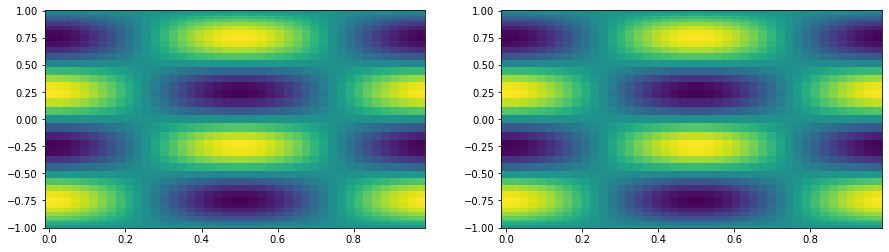

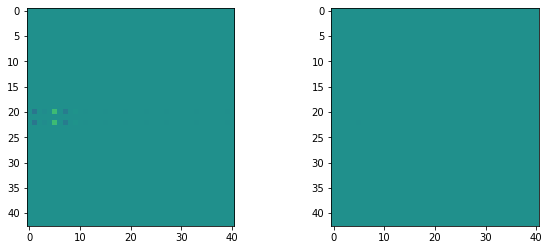

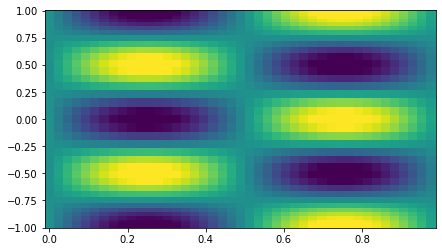

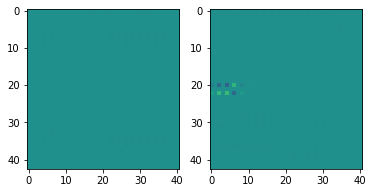

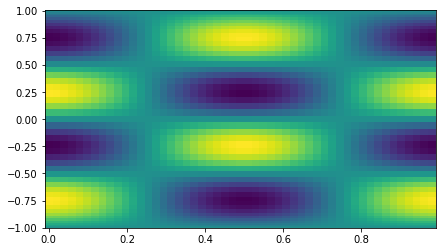

In [192]:
xDim = 43
yDim = 41
xBasis = FourBasis
yBasis = ChebBasis

f = lambda x, y: np.cos(2*np.pi*x) * np.sin(2*np.pi*y)#* np.cos(2*np.pi*y)
basis = BasisProduct.fromFunction(f, xDim, yDim, xBasis, yBasis)
X, Y = basis.grid()

# Evaluate function
C = basis.coef
F = basis.eval_grid()


# Differentiate
dbasis = basis.diff(1, 1)
dC = dbasis.coef
dF = dbasis.eval_grid()


# Evaluate with eval
# Test Padding
basis2 = 1. * basis.change_dim(51, 53)
X2, Y2 = basis2.grid()
F2 = basis2(X2.flatten(), Y2.flatten()).reshape(X2.shape)


################ PLOTTING
imargs={"vmin": -1, "vmax": 1}
imargs2={"vmin": -35, "vmax": 35}

########### FUNCTION
plt.figure(figsize=(15,4))

plt.subplot(121)
plt.pcolormesh(X, Y, F, **imargs)

plt.subplot(122)
plt.pcolormesh(X, Y, f(X, Y))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(np.real(C), **imargs)
plt.subplot(122)
plt.imshow(np.imag(C), **imargs)

########### DERIVATIVE
plt.figure(figsize=(7,4))
#plt.pcolormesh(X, Y, f(X, Y))
plt.pcolormesh(X, Y, dF, **imargs2)


plt.figure()
plt.subplot(121)
plt.imshow(np.real(dC), **imargs2)
plt.subplot(122)
plt.imshow(np.imag(dC), **imargs2)


########## DIRECT EVAL
plt.figure(figsize=(7,4))
plt.pcolormesh(X2, Y2, F2, **imargs)

## Robin Problem, Example:

The purpose of this framework is to solve the forced stokes flow equations

\begin{equation}
\Delta u  - \nabla p = f, \qquad \qquad \nabla \cdot u = 0
\end{equation}

with the boundary conditions

\begin{equation}
u(x, -1) + \alpha(x)\partial_y u(x, -1) = 0,\qquad \qquad u(x, 1) = g(x).
\end{equation}

We represent the solution by means of a stream function $\Psi(x,y) = \sin(2\pi m x)\cos(2\pi n y)$. Using this we obtain

\begin{equation}
    u(x,y) = \partial_y \Psi(x,y) = -2\pi n\sin(2\pi m x)\sin(2\pi n y), \qquad v(x,y) = -\partial_x\Psi(x,y) = -2\pi m\cos(2\pi m x)\cos(2\pi n y)
\end{equation}


/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return n

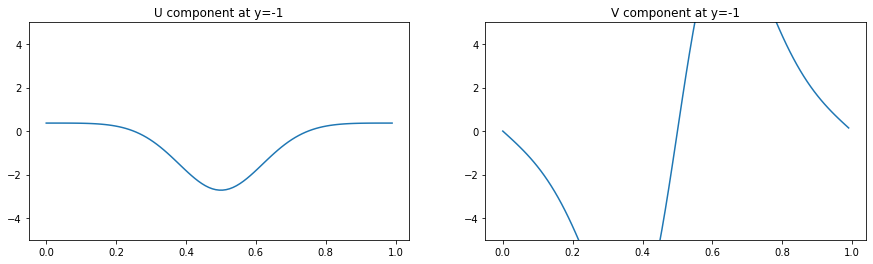

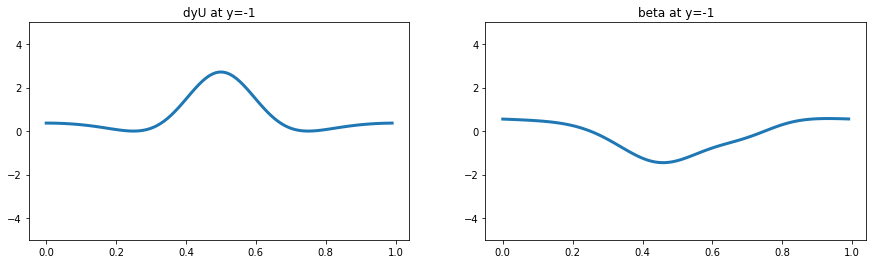

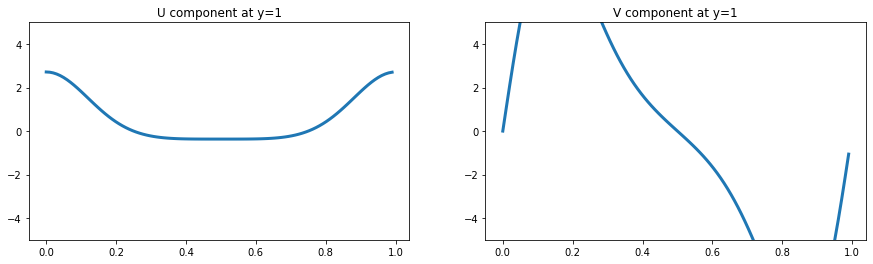

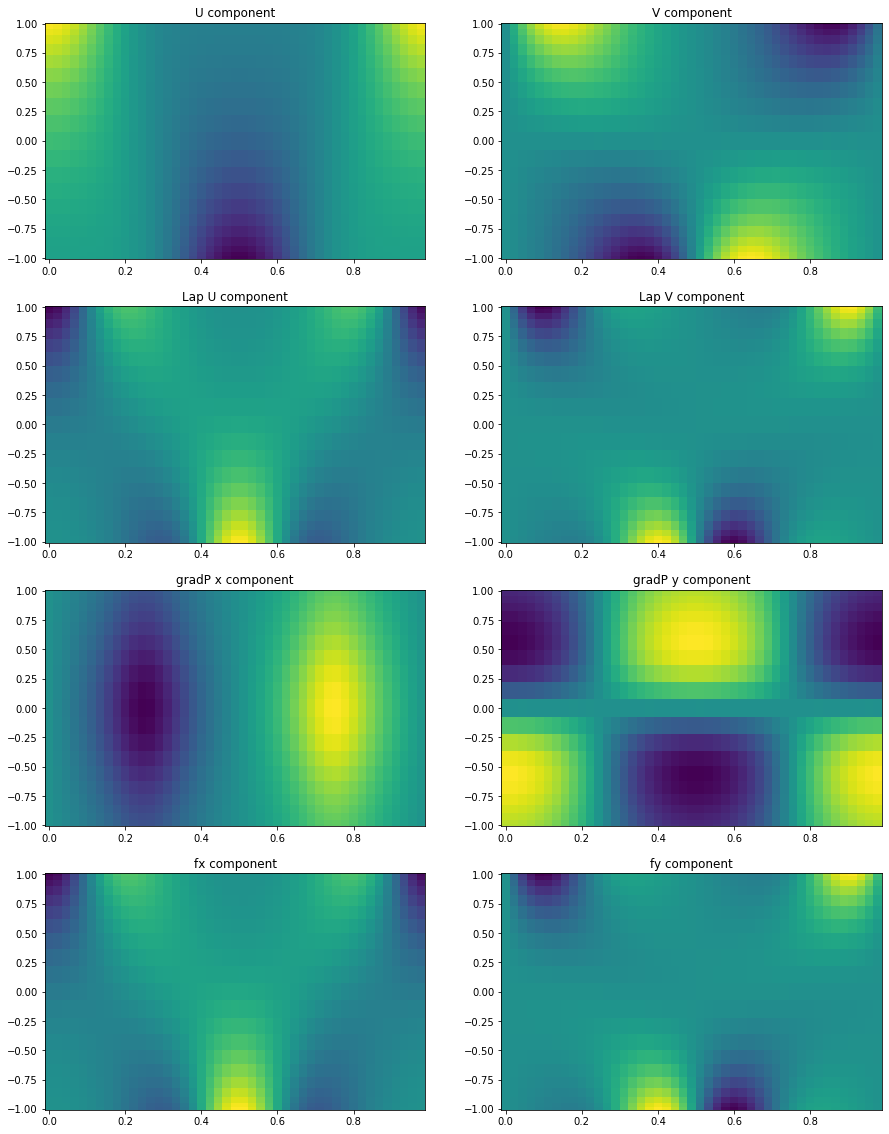

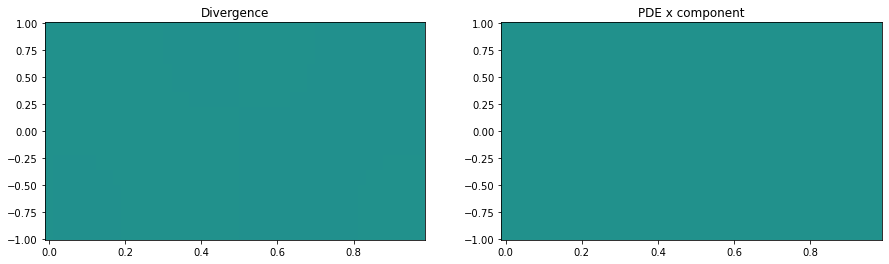

In [398]:
xDim = 45#23
yDim = 21#8
xBasis = FourBasis
yBasis = ChebBasis

psi = lambda x, y: np.exp(y*np.cos(2*np.pi*x))
p = lambda x,y: 1. / (y**2 + 1) * np.arctan(np.cos(2*np.pi*x));
a = lambda x: 1. / (np.sin(2*np.pi*x)+2);

p_basis = BasisProduct.fromFunction(p, xDim, yDim, xBasis, yBasis)
psi_basis = BasisProduct.fromFunction(psi, xDim, yDim, xBasis, yBasis)
alpha_basis = xBasis.fromFunction(a, xDim)

# U and V velocity components
u_basis = psi_basis.diff(0, 1)
v_basis = -1. * psi_basis.diff(1, 0)

# Divergence field
div_basis = u_basis.diff(1, 0) + v_basis.diff(0, 1)

# Laplacian and pressure gradients
lapu_basis = u_basis.diff(2, 0) + u_basis.diff(0, 2)
lapv_basis = v_basis.diff(2, 0) + v_basis.diff(0, 2)
dxp_basis = p_basis.diff(1,0)
dyp_basis = p_basis.diff(0,1)


### Problem parameters

# Inner force
f_basis = lapu_basis - dxp_basis
g_basis = lapv_basis - dyp_basis

# PDE x component
pde_basis = lapu_basis - dxp_basis - f_basis

# Upper boundary condition
uTop_basis = u_basis.reduce_eval(1, axis=1)
vTop_basis = v_basis.reduce_eval(1, axis=1)


# Lower boundary velocities
uBot_basis = u_basis.reduce_eval(-1, axis=1)
vBot_basis = v_basis.reduce_eval(-1, axis=1)


# Lower boundary slip coefficient
duBot_basis = u_basis.diff(0,1).reduce_eval(-1, axis=1)
beta_basis = uBot_basis + alpha_basis * duBot_basis


#plotargs = {"ymax="}
ylim=[-5,5]

# VELOCITY AT Y = -1
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("U component at y=-1")
uBot_basis.plot(plt.gca(), 101)#, **plotargs)
plt.ylim(ylim)

plt.subplot(122)
plt.title("V component at y=-1")
vBot_basis.plot(plt.gca(), 101)#, **plotargs)
plt.ylim(ylim)

# Y DERIVATIVE AND SLIP COEF AT Y = -1
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("dyU at y=-1")
duBot_basis.plot(plt.gca(), 101, **plotargs)
plt.ylim(ylim)

plt.subplot(122)
plt.title("beta at y=-1")
beta_basis.plot(plt.gca(), 101, **plotargs)
plt.ylim(ylim)

# VELOCITY AT Y = 1
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("U component at y=1")
uTop_basis.plot(plt.gca(), 101, **plotargs)
plt.ylim(ylim)

plt.subplot(122)
plt.title("V component at y=1")
vTop_basis.plot(plt.gca(), 101, **plotargs)
plt.ylim(ylim)


plt.figure(figsize=(15,20))
plt.subplot(421)
plt.title("U component")
u_basis.plot(plt.gca())
plt.subplot(422)
plt.title("V component")
v_basis.plot(plt.gca())
plt.subplot(423)
plt.title("Lap U component")
lapu_basis.plot(plt.gca())
plt.subplot(424)
plt.title("Lap V component")
lapv_basis.plot(plt.gca())
plt.subplot(425)
plt.title("gradP x component")
dxp_basis.plot(plt.gca())
plt.subplot(426)
plt.title("gradP y component")
dyp_basis.plot(plt.gca())
plt.subplot(427)
plt.title("fx component")
f_basis.plot(plt.gca())
plt.subplot(428)
plt.title("fy component")
g_basis.plot(plt.gca())





plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Divergence")
div_basis.plot(plt.gca(), vmax=1e-9, vmin=-1e-9)
plt.subplot(122)
plt.title("PDE x component")
pde_basis.plot(plt.gca(), vmax=1e-9, vmin=-1e-9)

In [399]:
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve


def spdiags(diags, offsets, shape):
    """Sparse diagonal matrix"""
    print(diags)
    print(offsets)
    indices = []
    values = []
    for i, o in enumerate(offsets):
        numel = min(shape[0], shape[1]-o) + min(0, o)
        roco = torch.zeros(2, numel, dtype=int)
        row = torch.arange(max(-o, 0), min(shape[0], shape[1]-o))
        col = row + o
        roco[0,:] = row
        roco[1,:] = col
        val = diags[i, max(0,o):(max(0, o)+numel)]
        indices.append(roco)
        values.append(val)
    indices = torch.hstack(indices)
    values = torch.hstack(values)
    mat = torch.sparse_coo_tensor(indices, values, shape)
    return mat

def speye(n):
    return spdiags(torch.ones(1, n), [0], (n, n))


def kron(A, B):
    cols = []
    for i in range(A.shape[1]):
        rows = []
        for j in range(A.shape[0]):
            rows.append(A[i,j] * B)
        cols.append(torch.vstack(rows))
    return torch.hstack(cols)
    


def sparse_coo(indx, data, *args, **kwargs):
    return sp.coo_matrix((data, indx), *args, **kwargs).tocsr()    

spdiags = lambda *args, **kwargs: sp.diags(*args, **kwargs).tocsr()
kron = lambda *args, **kwargs: sp.kron(*args, **kwargs).tocsr()
speye = lambda *args, **kwargs: sp.eye(*args, **kwargs).tocsr()

hstack = lambda *args, **kwargs: np.hstack(*args, **kwargs)
vstack = lambda *args, **kwargs: np.vstack(*args, **kwargs)

hstackSP = lambda *args, **kwargs: sp.hstack(*args, **kwargs)
vstackSP = lambda *args, **kwargs: sp.vstack(*args, **kwargs)


solve = lambda A, b: spsolve(A.tocsr(), b)
ones = lambda *args, **kwargs: np.ones(*args, **kwargs)
zeros = lambda *args, **kwargs: np.zeros(*args, **kwargs)
arange = lambda *args, **kwargs: np.arange(*args, **kwargs)

def flip(vec):
    return vec[::-1]


# TEST
x = torch.arange(1,6+1)[None,:].repeat(3,1)
print(type(spdiags(x, [0, -2, 4], (6,6))))#.to_dense()


<class 'scipy.sparse.csr.csr_matrix'>


In [400]:
logabs = lambda x: np.where(np.abs(x) > 1e-10, np.log(np.abs(x)), -10*np.ones_like(x).astype(float))


def solveRobinStokes(f, g, alpha, uTop, beta, vTop, vBot, Nx, Ny):
    """SOLVEROBINSTOKES   Solve 1-periodic Stokes equations on 2D domain [0,1]x[-1,1].
     The inputs must be ChebFourFun - objects.

     f:[0,1]x[-1,1] -> R  force in u-direction
     g:[0,1]x[-1,1] -> R  force in v-direction
     alpha:[0,1] -> R     variable shear constant
     uTop:[0,1] -> R      Dirichlet condition for u at y=1
     beta:[0,1] -> R      Inhom robin condition for u at y=-1
     vTop:[0,1] -> R      Dirichlet condition for v at y=1
     vBot:[0,1] -> R      Dirichlet condition for v at y=-1

     solveRobinStokes then solves The following boundary value problem:

         PDE: Moment equations
           (DxDx + DyDy)*u - Dx*p = f on [0,1]x[-1,1]
           (DxDx + DyDy)*v - Dy*p = g on [0,1]x[-1,1]
         PDE: Continuity Equations
                      Dx*u + Dy*v = 0 on [0,1]x[-1,1]
         BC: Boundary conditions
                         u - uTop = 0 on [0,1]x{1}
            u + alpha*Dy*u - beta = 0 on [0,1]x{-1}
                         v - vTop = 0 on [0,1]x{1}
                         v - vBot = 0 on [0,1]x{-1}
     Returns
      u, v. p must be solved using a pressure solver."""
    
    #K = max([f.K, g.K, alpha.K, uTop.K, beta.K, vTop.K, vBot.K]);
    #N = max([f.N, g.N, alpha.N, uTop.N, beta.N, vTop.N, vBot.N]);
    
    info = {"Dim": (Nx, Ny)}
    kmax = (Nx-1) // 2
    
    # Make sure the dimensions match. Truncate or zero pad.
    f = f.reshape(Nx, Ny)
    g = g.reshape(Nx, Ny)
    alpha = alpha.reshape(Nx,1)
    uTop = uTop.reshape(Nx,1)
    beta = beta.reshape(Nx,1)
    vTop = vTop.reshape(Nx,1)
    vBot = vBot.reshape(Nx,1) 
    
    #disp([f.N,g.N,alpha.N,uTop.N,beta.N,vTop.N,vBot.N])
    #disp([f.K,g.K,alpha.K,uTop.K,beta.K,vTop.K,vBot.K])
    
    t = time.time()
    # Laplace system 
    ns = arange(0, Ny)
    ks = arange(-kmax,kmax+1)
    cn = lambda n: 1. + (n==0) 
    # To correct low order coefficients!

    # Inverse d/dy matrix
    nVals = arange(1,Ny)[None, :]
    dyValm1 = cn(nVals-1) / (2*nVals)
    dyValp1 = -1 / (2*nVals)
    By = spdiags(vstack([dyValm1, dyValp1]), [0,2], (Ny-1,Ny))

    # Inverse dd/ddy matrix
    nVals = arange(2,Ny)[None, :]
    ddyValp2 = 1./(4.*nVals * (nVals+1))
    ddyVal0  = -1./(2.*(nVals ** 2 - 1))
    ddyValm2 = cn(nVals-2)/(4 * nVals * (nVals-1))
    By2 = spdiags(vstack([ddyValm2, ddyVal0, ddyValp2]), \
                         [0,2,4], (Ny-2, Ny))

    
    # Inverse ddd/dddy matrix
    nVals = arange(3, Ny)[None, :]
    dddyValp3 = -1 / (8*nVals * (nVals+1) * (nVals+2))
    dddyValp1 =  3 / (8*(nVals+2) * nVals * (nVals-1))
    dddyValm1 = -3 / (8*(nVals-2) * nVals *(nVals+1)) 
    dddyValm3 = cn(nVals-3) / (8*nVals * (nVals-1) * (nVals-2))

    By3 = spdiags(vstack([dddyValm3, dddyValm1, dddyValp1, dddyValp3]),\
                          [0,2,4,6], (Ny-3, Ny))

    Dx  = spdiags((2j*np.pi*(ks[None, :])) ** 1, [0], (Nx, Nx))
    Dx2 = spdiags((2j*np.pi*(ks[None, :])) ** 2, [0], (Nx, Nx))
    Dx3 = spdiags((2j*np.pi*(ks[None, :])) ** 3, [0], (Nx, Nx))

    Idx  = speye(Nx)
    Idy  = spdiags(ones((1, Ny-1)), [1], (Ny-1, Ny))
    Idy2 = spdiags(ones((1, Ny-2)), [2], (Ny-2, Ny))
    Idy3 = spdiags(ones((1, Ny-3)), [3], (Ny-3, Ny))

    # Eval
    botEval = kron(Idx, (-1) ** ns)
    
    topEval = kron(Idx, ones(ns.shape))
    dirZero = sparse_coo([[], []], [], (Nx, Ny*Nx))

    # Create B_upper
    AMat = spdiags(flip(alpha).repeat(Nx, 1), ks, (Nx, Nx))
    
    dyEval  = (ns ** 2) *(-1) ** (ns+1)
    botRobi = botEval + kron(AMat, dyEval)
    unit_const = (ks == 0)
    zero_const = sparse_coo([[],[]],[],((Ny-2),Nx*Ny))
    
    # B system
    #print(By.shape, By2.shape, By.shape)
    B11 = kron(Dx2[:kmax,:], By2[1:, :])+kron(Idx[:kmax,:], Idy3)
    B12 = -(kron(Dx3[:kmax,:], By3)+kron(Dx[:kmax,:], By[2:, :]))
    B21 = kron(unit_const, Idy2)
    B22 = zero_const
    B31 = kron(Dx2[kmax+1:,:], By2[1:, :])+kron(Idx[kmax+1:,:], Idy3)
    B32 = -(kron(Dx3[kmax+1:,:], By3)+kron(Dx[kmax+1:,:],By[2:, :]))
    B41 = kron(Dx, By)
    B42 = kron(Idx, Idy)
                  
    B_pde = vstackSP([hstackSP([B11, B12]),
                      hstackSP([B21, B22]),
                      hstackSP([B31, B32]),
                      hstackSP([B41, B42])])
    
    
    #### BUG?
    # MIGHT HAVE TO PERMUTE f.C DIMENSIONS
    ####
    
    b_mom = kron(Idx, By2[1:,:]) @ f.reshape(Ny*Nx, 1) \
                  - kron(Dx, By3) @ g.reshape(Ny*Nx, 1)
    b_pde = vstack([b_mom[0:(kmax*(Ny-3)),:],
                      By2 @ (f[kmax,:, None]),
                      b_mom[(kmax+1)*(Ny-3):,:],
                      zeros(((Ny-1)*Nx,1))])

    #print(b_mom[0:(kmax*(Ny-3)),:].shape)
    #plt.plot(np.real(By2 @ (f[kmax,:, None])))
    #plt.plot(np.imag(By2 @ (f[kmax,:, None])))
    # BC components
    B_dir = vstackSP([hstackSP([botRobi, dirZero]),\
                      hstackSP([dirZero, botEval]),\
                      hstackSP([topEval, dirZero]),\
                      hstackSP([dirZero[ks!=0,:], topEval[ks!=0, :]])\
                    ])

    b_dir = vstack([beta, vBot, uTop, vTop[ks!=0,:]])
    
    # solve
    B = vstackSP([B_pde, B_dir])    
    b = vstack([b_pde, b_dir])
    
    info["buildTime"] = time.time() - t;
    
    t = time.time()
    uv = solve(B, b)
    info["solveTime"] = time.time() - t
    
    
    L = Nx*Ny
    idx = arange(0, L)
    uC = uv[idx+0*L].reshape(Nx, Ny)
    vC = uv[idx+1*L].reshape(Nx, Ny)
    
    
    #Bs = [[B11, B12], [B21, B22], [B31, B32], [B41, B42]]
    #plt.figure(figsize=(10,10))
    #for i in range(8):
    #    plt.subplot(4,2,i+1)
    #    plt.imshow(np.abs(Bs[i//2][i%2].todense()))
    
    #plt.figure()
    #plt.imshow(np.log(np.abs(B.todense() + 1e-10)))
    
    
    info["B"] = B.todense()
    info["b"] = b
    info["By2"] = By2.todense()
    
    return uC, vC, info

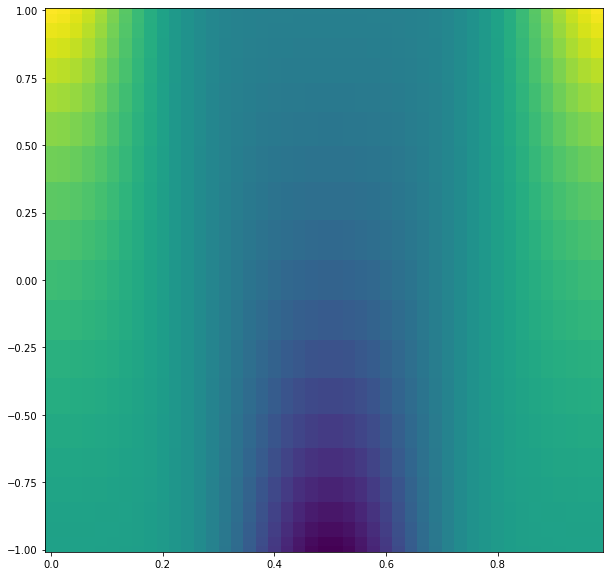

In [405]:

uC,vC,info = solveRobinStokes(f_basis.coef, 
                 g_basis.coef, 
                 alpha_basis.coef, 
                 uTop_basis.coef, 
                 beta_basis.coef, 
                 vTop_basis.coef, 
                 vBot_basis.coef, 
                 xDim, yDim)


B = info["B"]
b = info["b"]

#import scipy.io
#Blab = scipy.io.loadmat('/home/emastr/phd/util/Bmat.mat')['B']
#blab = scipy.io.loadmat('/home/emastr/phd/util/b.mat')['b']


plt.figure(figsize=(10,10))
uSol_basis = BasisProduct(uC, xDim, yDim, xBasis, yBasis)
uSol_basis.plot(plt.gca())



## Validate right hand side

/tmp/ipykernel_90444/3935354448.py:15: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(b))[ist:ien], label='abs')
/tmp/ipykernel_90444/3935354448.py:16: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(blab-b))[ist:ien], label='diff')


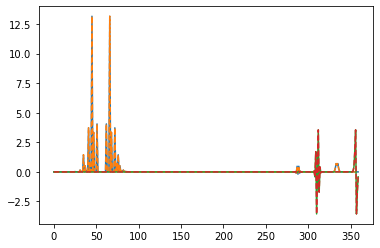

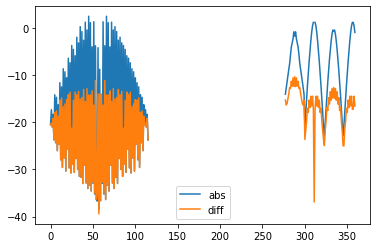

In [382]:
plt.figure()
ist, ien = 0, 360

plt.plot(np.real(blab)[ist:ien])
plt.plot(np.real(b)[ist:ien], '--')


plt.plot(np.imag(blab)[ist:ien])
plt.plot(np.imag(b)[ist:ien], '--')


#ist, ien = 0, 100

plt.figure()
plt.plot(np.log(np.abs(b))[ist:ien], label='abs')
plt.plot(np.log(np.abs(blab-b))[ist:ien], label='diff')
plt.legend()



## Validate matrix

complex128
complex128


/tmp/ipykernel_90444/4016954454.py:6: RuntimeWarning: divide by zero encountered in log10
  logabs = lambda x: np.where(np.abs(x) > 1e-15, np.log10(np.abs(x)), -15*np.ones_like(x).astype(float))
/tmp/ipykernel_90444/4016954454.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  logabs = lambda x: np.where(np.abs(x) > 1e-15, np.log10(np.abs(x)), -15*np.ones_like(x).astype(float))


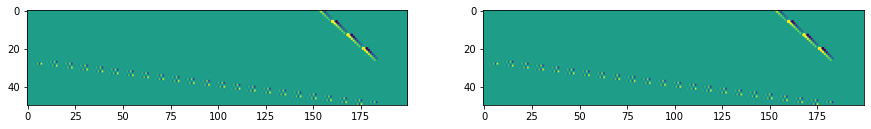

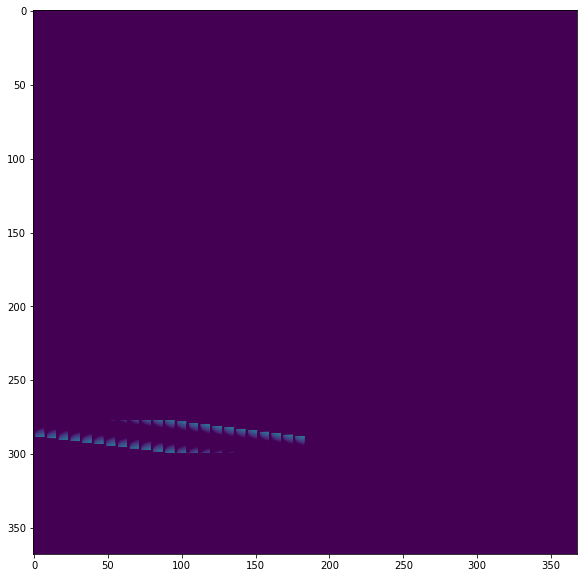

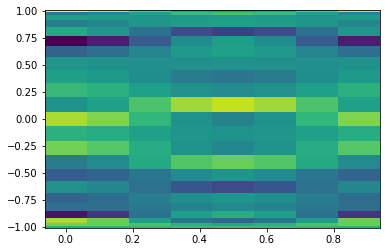

In [383]:
#print(Blab.shape)
#print(B.shape)

print(Blab.dtype)
print(B.dtype)
logabs = lambda x: np.where(np.abs(x) > 1e-15, np.log10(np.abs(x)), -15*np.ones_like(x).astype(float))
#np.where(np.abs(x) > 1e-10, np.log(np.abs(x)), -10*np.ones_like(x).astype(float))

#print(logabs(B))
rows, rowe, cols, cole = 250, 300, 0, 200

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.imshow(np.imag(B[rows:rowe, cols:cole]), vmin=-10, vmax=8)

plt.subplot(122)
#plt.imshow(np.abs((Blab-B)[rows:rowe, cols:cole])<1e-15)#, vmin=-10, vmax=8)
plt.imshow(np.imag(Blab[rows:rowe, cols:cole]), vmin=-10, vmax=8)#, vmin=-10, vmax=8)


plt.figure(figsize=(10,10))
#plt.imshow(np.abs((Blab-B)[rows:rowe, cols:cole])<1e-15)#, vmin=-10, vmax=8)
plt.imshow(logabs((Blab-B)), vmin=-9, vmax=0)#, vmin=-10, vmax=8)#, vmin=-10, vmax=8)





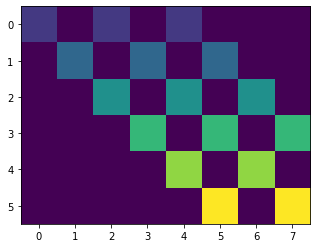

In [380]:
ddag = np.arange(1, 7)[None, :].repeat(3, 0)
ddag2 = spdiags(ddag, [0, 2, 4], (6, 8)).todense()
plt.imshow(ddag2)

In [198]:
np.kron(spdiags(np.ones(3), 1, 3, 3).todense(), spdiags(np.arange(1,4), 0, 3,3).todense())

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 3., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 2., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 3.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

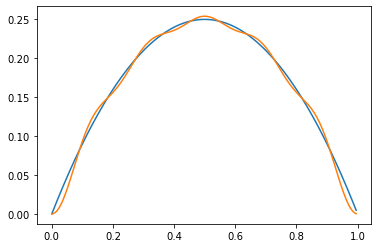

In [6]:
N = 11
K = N//2
g = lambda x: (x**1) * (1-x)

def sfft(x):
    return fftshift(fft(x)) / len(x)

def isfft(x):
    return np.real(ifft(ifftshift(x))) * len(x)

# Discrete grid
xf = np.linspace(0, 1, N+1)[:-1]
gxf = g(xf)


# Fourier tfm and frequencies
Fgx = sfft(gxf)
freq = np.arange(-K, K+1)


# HD padded frequencies
Np = 100
FgxHD = np.pad(Fgx, (Np, Np))
freqHD = np.arange(-Np-K, K+Np+1)
x = np.linspace(0,1,2*Np+N+1)[:-1]

# 
iFFgxHD = isfft(FgxHD)
iFFgx = isfft(Fgx)

#plt.plot(freqHD,  np.real(FgxHD))
#plt.plot(freq, np.real(Fgx))
#plt.plot(freqHD,  np.imag(FgxHD))
#plt.plot(freq, np.imag(Fgx))

#plt.figure()
#plt.plot(ifftshift(Fgx))
#plt.plot(ifftshift(FgxHD))


plt.figure()
plt.plot(x, g(x))
#plt.plot(xf, iFFgx)#-gxf)
plt.plot(x, iFFgxHD)#-g(x))


In [7]:

K = 10
N = 12

ks = np.arange(-K, K+1)
ns = np.arange(0, N+1)
f = np.exp(-np.abs(ks))[:, None] * np.exp(-np.abs(ns))[None, :]

class ChebFour():
    def __init__(self, coef):
        self.K = (coef.shape[0] - 1) // 2
        self.N = coef.shape[1] - 1
        
        self.coef = coef
        


In [ ]:
xDim = 101
yDim = 103
xBasis = FourBasis
yBasis = ChebBasis

psi = lambda x, y: np.exp(np.cos(2*np.pi*x)) * (np.exp(np.sin(2*np.pi*y))-1) / (2 * np.pi) ** 2
p = lambda x, y: np.sin(2*np.pi*x)

p_basis = BasisProduct.fromFunction(p, xDim, yDim, xBasis, yBasis)
psi_basis = BasisProduct.fromFunction(psi, xDim, yDim, xBasis, yBasis)

# U and V velocity components
u_basis = psi_basis.diff(0, 1)
v_basis = -1. * psi_basis.diff(1, 0)

# Divergence field
div_basis = u_basis.diff(1, 0) + v_basis.diff(0, 1)

# Laplacian and pressure gradients
lapu_basis = u_basis.diff(2, 0) + u_basis.diff(0, 2)
lapv_basis = v_basis.diff(2, 0) + v_basis.diff(0, 2)
dxp_basis = p_basis.diff(1,0)
dyp_basis = p_basis.diff(0,1)


### Problem parameters

# Inner force
fx_basis = lapu_basis - dxp_basis
fy_basis = lapv_basis - dyp_basis

# PDE x component
pde_basis = lapu_basis - dxp_basis - fx_basis

# Upper boundary condition
gx_basis = u_basis.reduce_eval(1, axis=1)
gy_basis = v_basis.reduce_eval(1, axis=1)


# Lower boundary velocities
hx_basis = u_basis.reduce_eval(-1, axis=1)
hy_basis = v_basis.reduce_eval(-1, axis=1)

# Lower boundary slip coefficient
dyhx_basis = u_basis.diff(0,1).reduce_eval(-1, axis=1)
alph_basis = (-1.) * (hx_basis / dyhx_basis)


#plotargs = {"ymax="}
ylim=[-3,3]

# VELOCITY AT Y = -1
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("U component at y=-1")
hx_basis.plot(plt.gca(), 101)#, **plotargs)
plt.ylim(ylim)

plt.subplot(122)
plt.title("V component at y=-1")
hy_basis.plot(plt.gca(), 101)#, **plotargs)
plt.ylim(ylim)

# Y DERIVATIVE AND SLIP COEF AT Y = -1
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("dyU at y=-1")
dyhx_basis.plot(plt.gca(), 101, **plotargs)
plt.ylim(ylim)

plt.subplot(122)
plt.title("alpha at y=-1")
alph_basis.plot(plt.gca(), 101, **plotargs)
plt.ylim(ylim)

# VELOCITY AT Y = 1
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("U component at y=1")
gx_basis.plot(plt.gca(), 101, **plotargs)
plt.ylim(ylim)

plt.subplot(122)
plt.title("V component at y=1")
gy_basis.plot(plt.gca(), 101, **plotargs)
plt.ylim(ylim)


plt.figure(figsize=(15,20))
plt.subplot(421)
plt.title("U component")
u_basis.plot(plt.gca())
plt.subplot(422)
plt.title("V component")
v_basis.plot(plt.gca())
plt.subplot(423)
plt.title("Lap U component")
lapu_basis.plot(plt.gca())
plt.subplot(424)
plt.title("Lap V component")
lapv_basis.plot(plt.gca())
plt.subplot(425)
plt.title("gradP x component")
dxp_basis.plot(plt.gca())
plt.subplot(426)
plt.title("gradP y component")
dyp_basis.plot(plt.gca())
plt.subplot(427)
plt.title("fx component")
fx_basis.plot(plt.gca())
plt.subplot(428)
plt.title("fy component")
fy_basis.plot(plt.gca())





plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Divergence")
div_basis.plot(plt.gca(), vmax=1e-9, vmin=-1e-9)
plt.subplot(122)
plt.title("PDE x component")
pde_basis.plot(plt.gca(), vmax=1e-9, vmin=-1e-9)